In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../../../data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['ClassLabel','Alcohol','MalicAcid']
df.sample(5)

,ClassLabel,Alcohol,MalicAcid
161,3,13.69,3.26
47,1,13.90,1.68
168,3,13.58,2.58
114,2,12.08,1.39
89,2,12.08,1.33


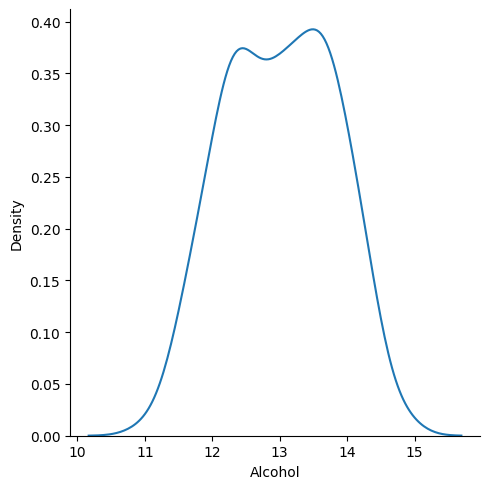

In [10]:
sns.displot(df['Alcohol'],kind='kde')

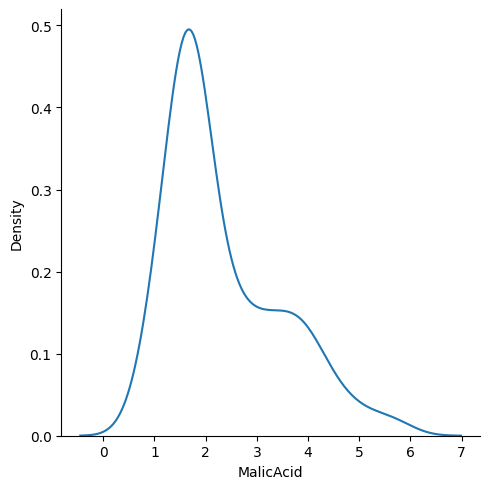

In [11]:
sns.displot(df['MalicAcid'],kind='kde')

<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

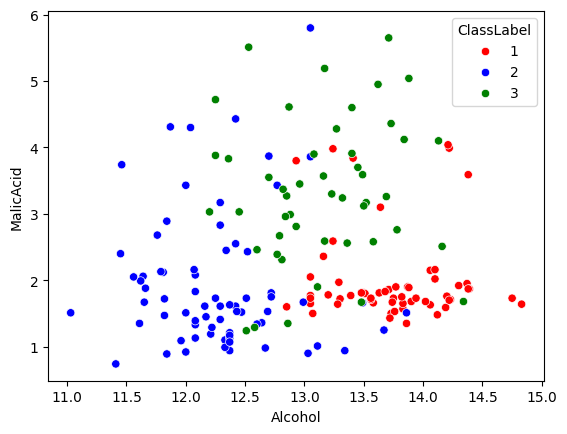

In [14]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['MalicAcid'],hue=df['ClassLabel'],palette=color_dict)

<Axes: xlabel='Alcohol', ylabel='Density'>

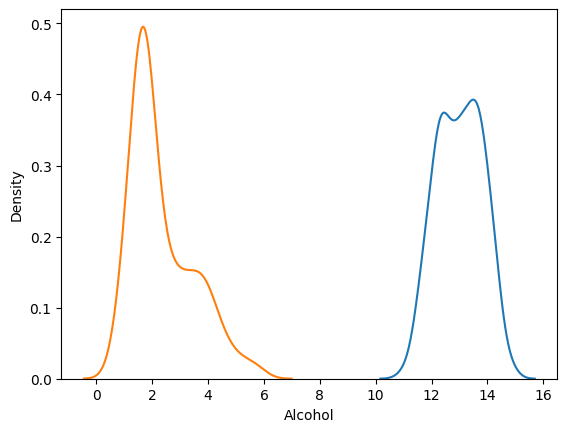

In [34]:
sns.kdeplot(df['Alcohol'])
sns.kdeplot(df['MalicAcid'])

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('ClassLabel',axis=1),
                                                    df['ClassLabel'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler on train data, it will learn the parameters
scaler.fit(X_train)

# transform the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [30]:
np.round(X_train.describe(),1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [31]:
np.round(X_train_scaled.describe(),1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


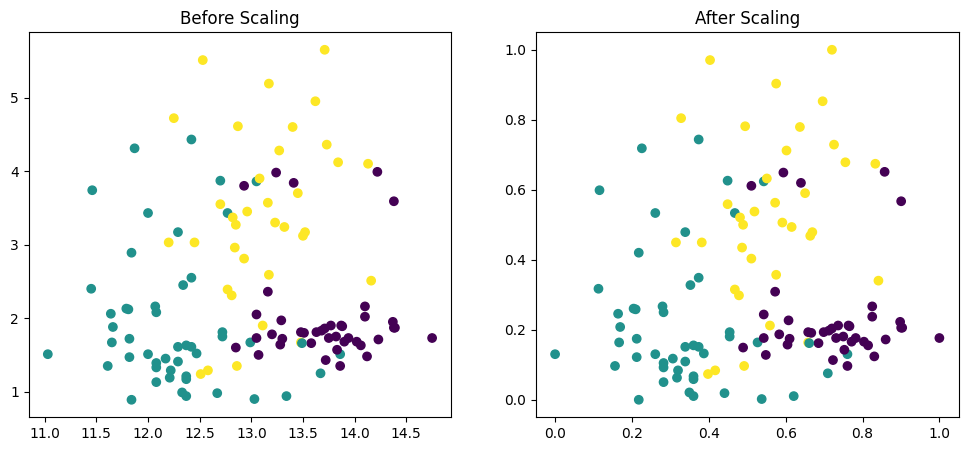

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['MalicAcid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['MalicAcid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

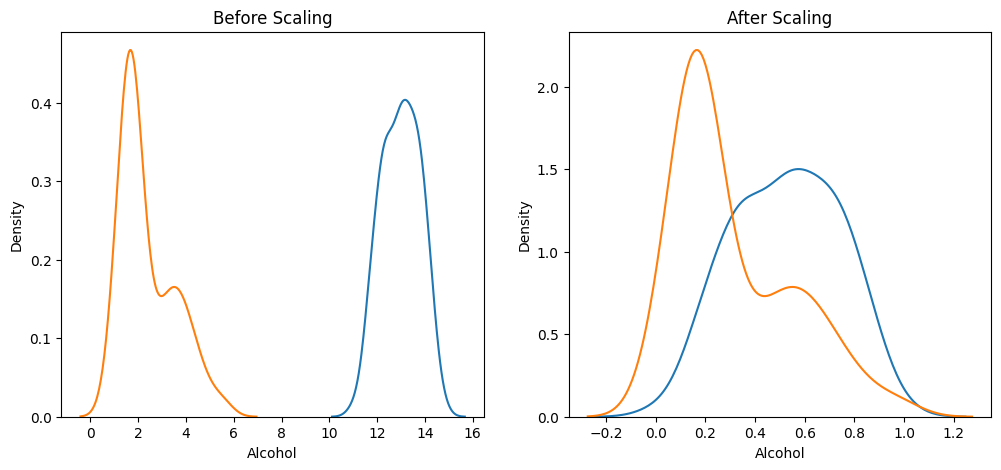

In [35]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['MalicAcid'],ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['MalicAcid'],ax=ax2)

plt.show()

Other Normalization Techniques
- mean normalization
- MaxAbsScaling
- Robust Scaling